# Case study on Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

## 1. Load the dataset into python environment


In [2]:
tit = pd.read_csv('titanic_dataset.csv')
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 3. Check the basic details of the dataset


In [4]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tit.shape

(891, 12)

- There are a total of 891 entries and 11 columns
- In which 3 of the columns have Missing values.

In [6]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Above is the number of Missing values in each columns

# 4. Fill in all the missing values present in all the columns in the dataset


- Age, Cabin,Embarked are the 3 columns with missing data


In [8]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
tit.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Age is a float data type 
- and Cabin and Embarked is an object data type

1. Age

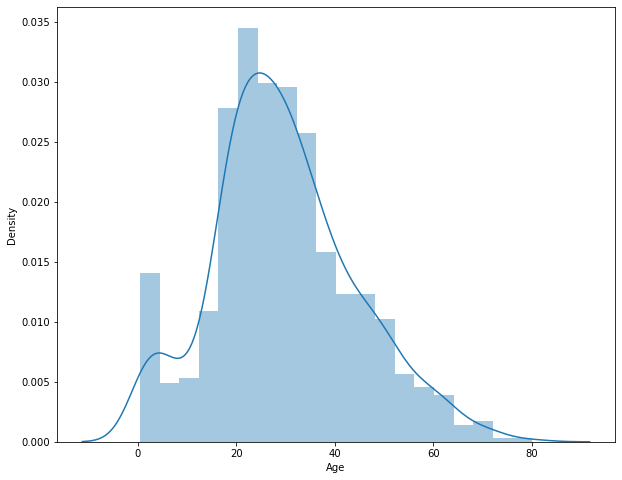

In [10]:
fig,ax =plt.subplots(figsize=(10,8))
sns.distplot(tit.Age)
plt.show()

In [11]:
d=tit['Name'].str.split(',', expand=True)
d1=d[1].str.split('.', expand=True)
d2=d1.drop([1,2], axis=1)
tit=pd.concat([tit, d2], axis=1)
tit= tit.rename(columns={tit.columns[-1]:'title'})
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [12]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title'],
      dtype='object')

In [13]:
tit['Age']=tit['Age'].fillna(tit.groupby('title')['Age'].transform('mean'))

In [14]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

2. Cabin

In [15]:
tit['Cabin'].isna().sum()

687

- Out of 891 entries 687 values are missing
- Which implies that more than 75% of the values are missing in Cabin column
- Since it is better to drop that column from the data set

In [16]:
tit.drop(['Cabin'],axis=1,inplace=True)

In [17]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


3. Embarked

In [18]:
tit['Embarked'].isna().sum()

2

- There are only 2 values missing and since the data type is object, it is better to use mode for filling the missing value

In [19]:
tit['Embarked'].mode()

0    S
dtype: object

In [20]:
tit['Embarked']= tit['Embarked'].fillna(tit['Embarked'].mode()[0])

In [21]:
tit.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64

- Now we could see that there is no missing values in any of the columns

1. Fare

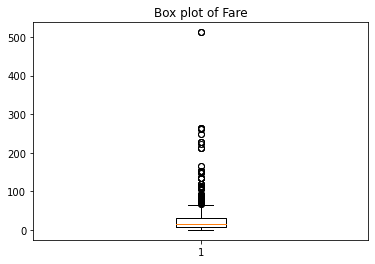

In [22]:
plt.boxplot(tit['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [23]:
Q1=np.quantile(tit['Fare'], .25)
Q2=np.quantile(tit['Fare'], .50)
Q3=np.quantile(tit['Fare'], .75)
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [24]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(IQR)
print(low_limit)
print(upper_limit)

23.0896
-26.724
65.6344


In [25]:
t=tit[(tit['Fare']<low_limit)|(tit['Fare']>upper_limit)]
ind=t.index
ind

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [26]:
tit.drop(ind, inplace=True)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


2. SibSp

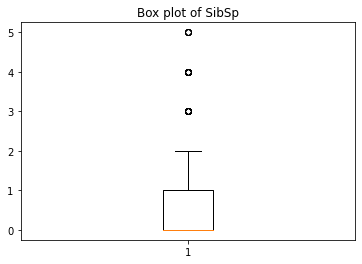

In [27]:
plt.boxplot(tit['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

In [28]:
Q1=np.quantile(tit['SibSp'], .25)
Q2=np.quantile(tit['SibSp'], .50)
Q3=np.quantile(tit['SibSp'], .75)
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [29]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(IQR)
print(low_limit)
print(upper_limit)

1.0
-1.5
2.5


In [30]:
d1=tit[(tit['SibSp']<low_limit)|(tit['SibSp']>upper_limit)]
ind=d1.index
ind

Int64Index([  7,  16,  24,  50,  59,  63,  68,  71,  85, 119, 164, 171, 176,
            182, 229, 233, 261, 266, 278, 374, 386, 409, 480, 485, 541, 542,
            634, 642, 683, 686, 726, 787, 813, 819, 824, 850],
           dtype='int64')

In [31]:
tit.drop(ind, inplace=True)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


3. Age

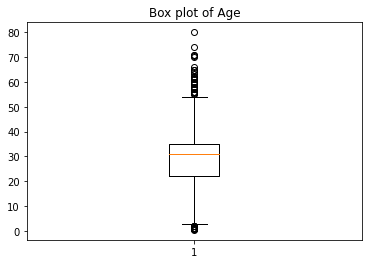

In [32]:
plt.boxplot(tit['Age'])
plt.title('Box plot of Age')
plt.show()

In [33]:
Q1=np.quantile(tit['Age'], .25)
Q2=np.quantile(tit['Age'], .50)
Q3=np.quantile(tit['Age'], .75)
print(Q1)
print(Q2)
print(Q3)

22.0
31.0
35.0


In [34]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(IQR)
print(low_limit)
print(upper_limit)

13.0
2.5
54.5


In [35]:
d1=tit[(tit['Age']<low_limit)|(tit['Age']>upper_limit)]
ind=d1.index
ind

Int64Index([ 11,  15,  33,  54,  78,  94,  96, 116, 152, 170, 172, 174, 183,
            205, 232, 252, 280, 326, 340, 381, 456, 467, 469, 479, 483, 487,
            492, 493, 530, 545, 555, 570, 625, 626, 630, 644, 647, 672, 684,
            694, 755, 772, 788, 803, 827, 831, 851],
           dtype='int64')

In [36]:
tit.drop(ind, inplace=True)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


In [37]:
tit.shape

(692, 12)

In [38]:
df=tit[['Survived','Pclass','title','Sex', 'Age', 'SibSp', 'Parch']]
df

,Survived,Pclass,title,Sex,Age,SibSp,Parch
0,0,3,Mr,male,22.000000,1,0
2,1,3,Miss,female,26.000000,0,0
3,1,1,Mrs,female,35.000000,1,0
4,0,3,Mr,male,35.000000,0,0
5,0,3,Mr,male,32.368090,0,0
...,...,...,...,...,...,...,...
886,0,2,Rev,male,27.000000,0,0
887,1,1,Miss,female,19.000000,0,0
888,0,3,Miss,female,21.773973,1,2
889,1,1,Mr,male,26.000000,0,0


## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [39]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.343931,2.489884,29.272158,0.274566,0.276012
std,0.475362,0.724723,9.897848,0.501564,0.759200
min,0.000000,1.000000,3.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000
75%,1.000000,3.000000,34.000000,0.000000,0.000000
max,1.000000,3.000000,54.000000,2.000000,6.000000


In [40]:
df.columns

Index(['Survived', 'Pclass', 'title', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [41]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['title','Sex']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    df[i] = label_encoders[i].fit_transform(df[i]) 
    print(df[i].value_counts())


8     450
6     121
9      92
5      11
11      5
1       5
4       2
0       1
10      1
3       1
12      1
7       1
2       1
Name: title, dtype: int64
1    475
0    217
Name: Sex, dtype: int64


In [42]:
y=df['Survived']
X=df.drop(['Survived'],axis=1)

In [43]:
X.describe()

,Pclass,title,Sex,Age,SibSp,Parch
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,2.489884,7.674855,0.686416,29.272158,0.274566,0.276012
std,0.724723,1.244288,0.464285,9.897848,0.501564,0.759200
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,8.000000,0.000000,22.000000,0.000000,0.000000
50%,3.000000,8.000000,1.000000,30.000000,0.000000,0.000000
75%,3.000000,8.000000,1.000000,34.000000,0.000000,0.000000
max,3.000000,12.000000,1.000000,54.000000,2.000000,6.000000


In [44]:
sc = preprocessing.MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.744942,0.639571,0.686416,0.515140,0.137283,0.046002
std,0.362361,0.103691,0.464285,0.194075,0.250782,0.126533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.666667,0.000000,0.372549,0.000000,0.000000
50%,1.000000,0.666667,1.000000,0.529412,0.000000,0.000000
75%,1.000000,0.666667,1.000000,0.607843,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [45]:
#spliting of data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(553, 6)

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pre=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    acc_values.append(acc)

In [48]:
acc_values

[0.7985611510791367,
 0.7913669064748201,
 0.8057553956834532,
 0.7769784172661871,
 0.7841726618705036,
 0.7913669064748201,
 0.7841726618705036,
 0.7913669064748201,
 0.7985611510791367,
 0.7985611510791367,
 0.7841726618705036,
 0.7769784172661871]

Text(0, 0.5, 'acccuracy')

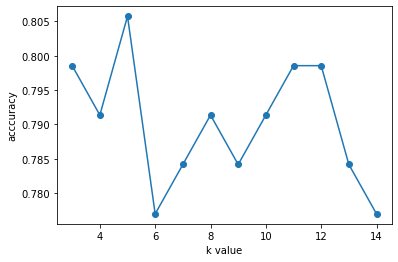

In [49]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acccuracy')

In [50]:
Classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
Classifier.fit(X_train,y_train)
y_pre=Classifier.predict(X_test)

In [51]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))
print("Precision score :",precision_score(y_test,y_pre,average='micro'))
print("Recall_score :",recall_score(y_test,y_pre,average='micro'))

Accuracy is: 0.8057553956834532
f1_score is: 0.8057553956834532
Precision score : 0.8057553956834532
Recall_score : 0.8057553956834532


In [52]:
confusion_matrix(y_test, y_pre)

array([[82,  9],
       [18, 30]], dtype=int64)

## SVM

In [53]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
y_pre = svm.predict(X_test)

In [54]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))
print("Precision score :",precision_score(y_test,y_pre,average='micro'))
print("Recall_score :",recall_score(y_test,y_pre,average='micro'))

Accuracy is: 0.7697841726618705
f1_score is: 0.7697841726618704
Precision score : 0.7697841726618705
Recall_score : 0.7697841726618705


In [55]:
confusion_matrix(y_test, y_pre)

array([[77, 14],
       [18, 30]], dtype=int64)

## Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [56]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'K-Mean':{
        'model': KNeighborsClassifier(metric='minkowski'),
        'params':{
            'n_neighbors':[7,11,13]
        }
    }
}

In [57]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'],scoring='accuracy', cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    accuracy_score(y_test, y_pre)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.808354,"{'C': 20, 'kernel': 'rbf'}"
1,K-Mean,0.792007,{'n_neighbors': 13}
